# Process vs thread

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor

MULTITHREADING='MULTITHREADING'
MULTIPROCESSING='MULTIPROCESSING'

def visualize_runtimes(results, title):
    """Graphical visualization
    """
    start,stop = np.array(results).T
    plt.barh(range(len(start)),stop-start,left=start)
    plt.grid(axis='x')
    plt.ylabel("Tasks")
    plt.xlabel("Seconds")
    plt.title(title)
    return {'total_time': stop[-1]-start[0]}

def multithreading(func, num_of_tasks, workers):
    """Threading setup function 
    """
    begin_time = time.time()
    with ThreadPoolExecutor(max_workers=workers) as executor:
        res = executor.map(func, [begin_time for i in range(num_of_tasks)])
    return list(res)
        
def multiprocessing(func, num_of_tasks, workers):
    """Multiprocessing setup function
    """
    begin_time = time.time()
    with ProcessPoolExecutor(max_workers=workers) as executor:
        res = executor.map(func, [begin_time for i in range(num_of_tasks)])
    return list(res)

def io_heavy_task(start_time):
    """Simulation of I/O heavy task
    """
    start = time.time() - start_time

    long_str = [b'Hello World!'] * 100
    b = BytesIO(b''.join(long_str))

    # simulated reading from a file
    # in that case file is BytesIO 
    with b as f:
        a=f.read()
    stop = time.time() - start_time

    return start, stop

def cpu_heavy_task(start_time):
    """Simulation of I/O heavy task
    """
    start = time.time() - start_time
    count = 0
    for i in range(10**7):
        count += i
    stop = time.time() - start_time

    return start, stop

# Example

{'total_time': 0.9448192119598389}

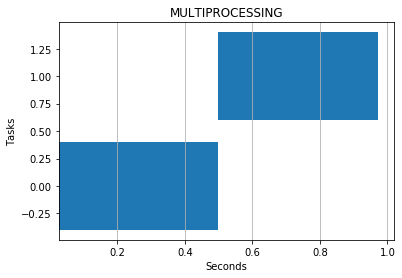

In [2]:
""" Single 
"""

num_of_tasks = 2
workers = 1

visualize_runtimes(multiprocessing(cpu_heavy_task, num_of_tasks, workers), MULTIPROCESSING)

# CPU Heavy tasks - process vs thread

{'total_time': 0.6251735687255859}

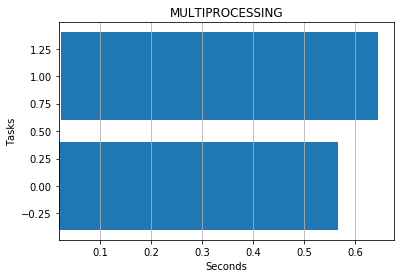

In [7]:
""" cpu heavy - process
"""

num_of_tasks = 2
workers = 2

visualize_runtimes(multiprocessing(cpu_heavy_task, num_of_tasks, workers), MULTIPROCESSING)

{'total_time': 0.947188138961792}

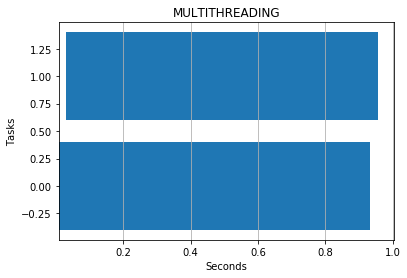

In [6]:
""" cpu heavy - thread
"""

num_of_tasks = 2
workers = 2

visualize_runtimes(multithreading(cpu_heavy_task, num_of_tasks, workers), MULTITHREADING)

## I/O heavy - process vs thread

{'total_time': 0.019290685653686523}

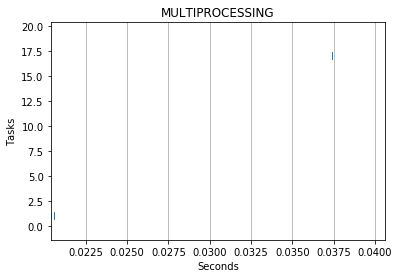

In [18]:
""" i/o heavy - process
"""

num_of_tasks = 20
workers = 2

visualize_runtimes(multiprocessing(io_heavy_task, num_of_tasks, workers), MULTIPROCESSING)

{'total_time': 0.005018711090087891}

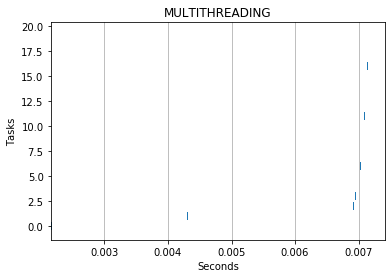

In [19]:
""" i/o heavy - threads
"""

num_of_tasks = 20
workers = 2

visualize_runtimes(multithreading(io_heavy_task, num_of_tasks, workers), MULTITHREADING)